# FEATURE ENGINEERING AND SELECTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let us start with importing our data

In [2]:
df=pd.read_csv('Healthcare data.csv')

We will begin with dropping irrelevant variables as decided during the exploratory data analysis

# FEATURE ENGINEERING

In [3]:
df=df.drop(['case_id', 'patientid', 'City_Code_Patient',  'City_Code_Hospital', 'Hospital_code'], axis=1)

During EDA, we saw that 'Bed Grade' and 'City_Code_Hospital' features had some missing values. Since the later has been dropped, we will be dealing only with the first one. 

In [4]:
df.isnull().sum()

Hospital_type_code                     0
Hospital_region_code                   0
Available Extra Rooms in Hospital      0
Department                             0
Ward_Type                              0
Ward_Facility_Code                     0
Bed Grade                            113
Type of Admission                      0
Severity of Illness                    0
Visitors with Patient                  0
Age                                    0
Admission_Deposit                      0
Stay                                   0
dtype: int64

In [5]:
a=df['Bed Grade'].isnull().sum()
a

113

So, there are 113 missing values for the bed grade.

In [6]:
b=len(df['Bed Grade'])

In [7]:
a, b

(113, 318438)

In [8]:
(a/b)*100

0.035485714644609

The missing values for the variable 'Bed Grade' are approximately 3.5%. Thus, we can replace the missing values with the most recurring values. Let us have a look at the countplot for the variable

C:\Users\Faayez\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bed Grade', ylabel='count'>

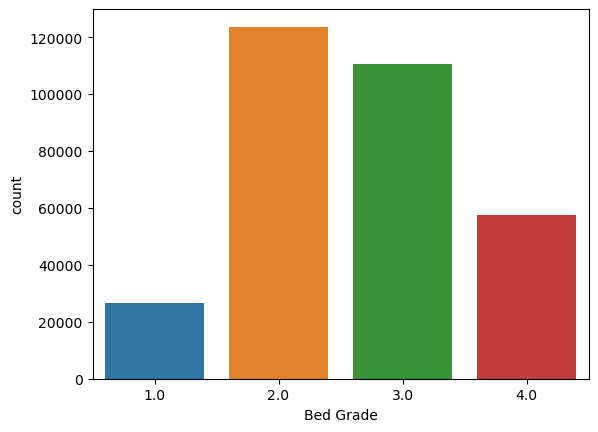

In [9]:
sns.countplot('Bed Grade', data=df)

The most recurring value for the variable is 2.0, therefore we will fill this value in place of the missing values.

In [10]:
df['Bed Grade']=df['Bed Grade'].replace([np.nan], df['Bed Grade'].mode())

We can now check if there are any null values for this variable.

In [11]:
df['Bed Grade'].isnull().sum()

0

So, there are no more null values. 

# FEATURE SELECTION

We have a lot of categorical variables in our data. Since the dependent variable is also dependent it makes sense to perform a chi square test of independence. 

In [12]:
from bioinfokit.analys import stat

We will set the following null and alternate hypothesis for the variables - Hospital_type_code, Hospital_region_code, Department, Ward_Type, Ward_Facility_Code, Type of Admission, Severity of Illness and Age, as follow:

H0: There is NO relationship between the categorical variable and the dependent variable

H1: There is a relationship between the categorical variable and the dependent variable

We will be testing these hypotheses at significance level (alpha) = 0.05.

**Chi2 test for Hospital_type_code**

In [13]:
stayVShtype=pd.pivot_table(df[['Hospital_type_code', 'Stay']], index='Hospital_type_code', columns='Stay', aggfunc=len).transpose()
stayVShtype

Hospital_type_code,a,b,c,d,e,f,g
Stay,,,,,,,
0-10,10559,5145,3588,1314,1805,1023,170
11-20,39807,13933,10318,4423,6644,2332,682
21-30,40286,19541,12526,5527,6524,1897,1190
31-40,23974,12385,8222,3706,4060,2093,719
41-50,4111,3893,1872,760,764,204,139
51-60,14617,6909,5176,2713,2832,1960,811
61-70,924,917,430,186,197,44,46
71-80,3722,2608,1611,761,824,482,246
81-90,1890,1026,725,421,395,254,127


In [14]:
res=stat()
res.chisq(stayVShtype)
print(res.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson           60       5540.64          0
Log-likelihood    60       5386.06          0



Since P-value is less than 0.05, we will be keeping this variable in the model

**Chi2 test for Hospital_region_code**

In [15]:
stayVShrcode=pd.pivot_table(df[['Hospital_region_code', 'Stay']], index='Hospital_region_code', columns='Stay', aggfunc=len).transpose()
stayVShrcode

Hospital_region_code,X,Y,Z
Stay,,,
0-10,8145,10447,5012
11-20,33885,29786,14468
21-30,38768,31595,17128
31-40,22830,21314,11015
41-50,4405,5036,2302
51-60,14723,13023,7272
61-70,1012,1184,548
71-80,4091,4069,2094
81-90,1910,1940,988


In [16]:
res1=stat()
res1.chisq(stayVShrcode)
print(res1.summary)


Chi-squared test for independence

Test              Df    Chi-square       P-value
--------------  ----  ------------  ------------
Pearson           20       1216.59  2.10724e-245
Log-likelihood    20       1226.01  2.03965e-247



Since P-value is less than 0.05, we will be keeping this variable in the model

**Chi2 test for Department**

In [17]:
stayVSDepartment=pd.pivot_table(df[['Department', 'Stay']], index='Department', columns='Stay', aggfunc=len).transpose()
stayVSDepartment

Department,TB & Chest disease,anesthesia,gynecology,radiotherapy,surgery
Stay,,,,,
0-10,791,1519,18849,2379,66
11-20,2379,8823,59690,6988,259
21-30,2618,8950,68383,7263,277
31-40,1753,4958,43535,4713,200
41-50,300,851,9671,879,42
51-60,1047,2527,27989,3256,199
61-70,76,173,2226,264,5
71-80,294,703,8165,1043,49
81-90,140,384,3748,528,38


In [18]:
res2=stat()
res2.chisq(stayVSDepartment)
print(res2.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson           40       1618.92          0
Log-likelihood    40       1617.26          0



Since P-value is less than 0.05, we will be keeping this variable in the model

**Chi2 test for Ward_Type**

In [19]:
stayVSwtype=pd.pivot_table(df[['Ward_Type', 'Stay']], index='Ward_Type', columns='Stay', aggfunc=len).transpose()
stayVSwtype= stayVSwtype.fillna(0)
stayVSwtype

Ward_Type,P,Q,R,S,T,U
Stay,,,,,,
0-10,461.0,8315.0,9310.0,5407.0,110.0,1.0
11-20,1393.0,29204.0,31621.0,15649.0,269.0,3.0
21-30,1802.0,34736.0,36698.0,13862.0,390.0,3.0
31-40,745.0,17177.0,22047.0,14897.0,291.0,2.0
41-50,285.0,4946.0,4269.0,2174.0,69.0,0.0
51-60,186.0,6507.0,13733.0,14402.0,190.0,0.0
61-70,73.0,986.0,1045.0,627.0,13.0,0.0
71-80,53.0,1953.0,4006.0,4186.0,56.0,0.0
81-90,14.0,792.0,1692.0,2301.0,39.0,0.0


In [20]:
res3=stat()
res3.chisq(stayVSwtype)
print(res3.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson           50       18451.4          0
Log-likelihood    50       18326.2          0



Since P-value is less than 0.05, we will be keeping this variable in the model

**Chi2 test for Ward_Facility_Code**

In [21]:
stayVSwfc=pd.pivot_table(df[['Ward_Facility_Code', 'Stay']], index='Ward_Facility_Code', columns='Stay', aggfunc=len).transpose()
stayVSwfc

Ward_Facility_Code,A,B,C,D,E,F
Stay,,,,,,
0-10,2382,2607,3921,3919,3486,7289
11-20,6135,7874,12068,9844,15081,27137
21-30,7476,8629,7867,15099,16357,32063
31-40,5003,6421,5591,9302,9215,19627
41-50,1198,1090,595,3351,1704,3805
51-60,3155,5059,3225,4739,5608,13232
61-70,255,250,138,796,411,894
71-80,967,1381,721,1967,1511,3707
81-90,408,768,400,772,735,1755


In [22]:
res4=stat()
res4.chisq(stayVSwfc)
print(res4.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson           50       7507.47          0
Log-likelihood    50       7255.26          0



Since P-value is less than 0.05, we will be keeping this variable in the model

**Chi2 test for Type of Admission**

In [23]:
stayVSAdmission=pd.pivot_table(df[['Type of Admission', 'Stay']], index='Type of Admission', columns='Stay', aggfunc=len).transpose()
stayVSAdmission

Type of Admission,Emergency,Trauma,Urgent
Stay,,,
0-10,14218,5328,4058
11-20,31559,33745,12835
21-30,27399,46244,13848
31-40,18921,28107,8131
41-50,4145,5968,1630
51-60,11885,18310,4823
61-70,976,1479,289
71-80,3375,5551,1328
81-90,1708,2548,582


In [24]:
res5=stat()
res5.chisq(stayVSAdmission)
print(res5.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson           20       9632.54          0
Log-likelihood    20       9896.03          0



Since P-value is less than 0.05, we will be keeping this variable in the model

**Chi2 test for Severity of Illness**

In [25]:
stayVSseverity=pd.pivot_table(df[['Severity of Illness', 'Stay']], index='Severity of Illness', columns='Stay', aggfunc=len).transpose()
stayVSseverity

Severity of Illness,Extreme,Minor,Moderate
Stay,,,
0-10,3399,7866,12339
11-20,10518,27081,40540
21-30,15502,21535,50454
31-40,10086,14447,30626
41-50,2351,3000,6392
51-60,7777,7128,20113
61-70,647,519,1578
71-80,2575,1928,5751
81-90,1113,985,2740


In [26]:
res6=stat()
res6.chisq(stayVSseverity)
print(res6.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson           20       6616.48          0
Log-likelihood    20       6564.47          0



Since P-value is less than 0.05, we will be keeping this variable in the model

**Chi2 test for Age**

In [27]:
stayVSAge=pd.pivot_table(df[['Age', 'Stay']], index='Age', columns='Stay', aggfunc=len).transpose()
stayVSAge

Age,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100
Stay,,,,,,,,,,
0-10,615,1552,3467,4916,4727,3427,2194,2201,422,83
11-20,1959,5343,11272,15792,14959,11346,7870,7958,1392,248
21-30,1489,4312,11394,18550,17906,13058,9033,9534,1920,295
31-40,1014,2681,6912,10912,10983,8569,5930,6420,1504,234
41-50,187,510,1398,2373,2507,1735,1205,1383,379,66
51-60,582,1429,3793,6517,7189,5739,4081,4433,1082,173
61-70,26,89,263,509,562,448,325,378,115,29
71-80,153,350,1026,1807,2146,1710,1230,1367,402,63
81-90,84,223,546,801,885,784,600,670,216,29


In [28]:
res7=stat()
res7.chisq(stayVSAge)
print(res7.summary)


Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson           90       3652.89          0
Log-likelihood    90       3581.69          0



Since P-value is less than 0.05, we will be keeping this variable in the model

Having completed the feature selection tests for categorical variables we will be moving on to the categorical variables. We have four numeric variables in our model, we will perform a slightly altered form of chi2 to decide which features to keep.

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [30]:
X_num_sel=df[['Available Extra Rooms in Hospital', 'Bed Grade', 'Visitors with Patient', 'Admission_Deposit']]
y_num_sel=df['Stay']

In [31]:
chi2_selector = SelectKBest(chi2, k=2)
kbest=chi2_selector.fit_transform(X_num_sel, y_num_sel)

Using chi2 test we will be calculating the chi2 scores for the given variables. After calculating the chi2 squares we will be selecting only the top two variables **(This is the reason why 'k' has been given a value of 2)**

In [32]:
chi2_scores=pd.DataFrame(list(zip(X_num_sel.columns, chi2_selector.scores_)), columns=['features', 'scores'])

In [33]:
chi2_scores

,features,scores
0,Available Extra Rooms in Hospital,2.949505e+03
1,Bed Grade,1.268505e+03
2,Visitors with Patient,1.007976e+05
3,Admission_Deposit,1.116662e+06


In [34]:
np.asarray(X_num_sel.columns)[chi2_selector.get_support()]

array(['Visitors with Patient', 'Admission_Deposit'], dtype=object)

So, we will be selecting only these two columns for the model and will be dropping the other two features.

In [35]:
df=df.drop(['Available Extra Rooms in Hospital', 'Bed Grade'], axis=1)

Recall that during EDA, we found that 'Visitors with Patient' was a highly skewed feature with many outliers. To solve this issue we will be using log transformation to make this data normally distributed

In [36]:
df['Visitors with Patient']=np.log10(df['Visitors with Patient'])

C:\Users\Faayez\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [37]:
df['Visitors with Patient']

0         0.301030
1         0.301030
2         0.301030
3         0.301030
4         0.301030
            ...   
318433    0.477121
318434    0.602060
318435    0.477121
318436    0.698970
318437    0.301030
Name: Visitors with Patient, Length: 318438, dtype: float64

# MODEL BUILDING

Having engineered and selected the features, we are now in a position to start building our model. 

**Let us begin by assigining dummies to our categorical variables**

Dummies for 'Department'

In [38]:
dumms=pd.get_dummies(df['Department'])
df=pd.concat([df, dumms], axis=1)
df.drop(['Department', 'surgery'], inplace=True, axis=1)

Dummies for 'Type of Admission'

In [39]:
dumms1=pd.get_dummies(df['Type of Admission'])
df=pd.concat([df, dumms1], axis=1)
df.drop(['Type of Admission', 'Urgent'], inplace=True, axis=1)

Dummies for 'Severity of Illness'

In [40]:
dumms2=pd.get_dummies(df['Severity of Illness'])
df=pd.concat([df, dumms2], axis=1)
df.drop(['Severity of Illness', 'Moderate'], inplace=True, axis=1)

Dummies for 'Age'

In [41]:
dumms3=pd.get_dummies(df['Age'])
df=pd.concat([df, dumms3], axis=1)
df.drop(['Age', '91-100'], inplace=True, axis=1)

Dummies for 'Hospital_type_code'

In [42]:
dumms5=pd.get_dummies(df['Hospital_type_code'])
df=pd.concat([df, dumms5], axis=1)
df.drop(['Hospital_type_code', 'g'], inplace=True, axis=1)

Dummies for 'Hospital_region_code'

In [43]:
dumms7=pd.get_dummies(df['Hospital_region_code'])
df=pd.concat([df, dumms7], axis=1)
df.drop(['Hospital_region_code', 'Z'], inplace=True, axis=1)

Dummies for 'Ward_Type'

In [44]:
dumms8=pd.get_dummies(df['Ward_Type'])
df=pd.concat([df, dumms8], axis=1)
df.drop(['Ward_Type', 'U'], inplace=True, axis=1)

Dummies for 'Ward_Facility_Code'

In [45]:
dumms9=pd.get_dummies(df['Ward_Facility_Code'])
df=pd.concat([df, dumms9], axis=1)
df.drop(['Ward_Facility_Code', 'F'], inplace=True, axis=1)

We need to assign numbers to our target feature 'Stay':

In [46]:
df['Stay'].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [47]:
df['Stay']=df['Stay'].replace({'0-10':1, '41-50':5, '31-40':4, '11-20':2, '51-60':6, '21-30':3, '71-80':8,'More than 100 Days':11, '81-90':9, '61-70':7, '91-100':10})

**We can now split the data**

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X=df.drop('Stay', axis=1)
y=df['Stay']

Before we proceed, recall that in EDA we observed that the dependent variable, which is a categorical variable had imbalanced class counts. To remove this balance we will be performing oversampling on our data and then split it.

In [50]:
from imblearn.over_sampling import RandomOverSampler  

over_sampler = RandomOverSampler()
X_res, y_res = over_sampler.fit_resample(X, y)

**NOTE:** We have used oversampling instead of undersampling here because the minority classes had so few number of counts that the size of the entire training set reduced from 300k+ to just around 30k. With 11 classes to predict, such a small amount of data resulted in a machine learning model which had an accuracy of just 30%. So, oversampling has been used. The oversampling increased the data size from 300k to around 900k which obviously made the training time for the model longer. But this model, as we will see in the model evaluation step, will give an impressive accuracy rate of around 84%.

We can now split the data

In [51]:
X_train, X_test, y_train,  y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=101)

**TRAINING AND TESTING THE MODEL**

For our data we will be using random forest classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

**NOTE**: We are adding an additional step here of removing positive infinity from our data. Though this was not encountered in data preprocessing, but when the RandomForestClassifier was run without replacing positive infinity, the following error showed up: **"Input contains infinity or a value too large for dtype('float32')**, and therefore the following four steps are being implemented:

In [53]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [54]:
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [55]:
y_train = y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [56]:
y_test = y_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [57]:
X_train.shape, X_test.shape

((721800, 37), (240601, 37))

We can now train our model:

In [58]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
rfc_predict = rfc.predict(X_test)

In [60]:
rfc_predict

array([ 2,  6,  9, ...,  6,  2, 11], dtype=int64)

**MODEL EVALUATION**

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           1       0.81      0.95      0.87     21833
           2       0.52      0.42      0.47     21845
           3       0.47      0.35      0.40     21782
           4       0.67      0.64      0.65     21975
           5       0.89      1.00      0.94     21810
           6       0.83      0.88      0.85     21983
           7       0.97      1.00      0.99     21690
           8       0.95      1.00      0.97     21927
           9       0.98      1.00      0.99     22017
          10       0.99      1.00      0.99     21836
          11       0.98      1.00      0.99     21903

    accuracy                           0.84    240601
   macro avg       0.82      0.84      0.83    240601
weighted avg       0.82      0.84      0.83    240601



In [63]:
print(confusion_matrix(y_test, rfc_predict))

[[20741   392   352   151    72    73    30     5     5     5     7]
 [ 2086  9249  5502  2605   802  1042   137   236    52    60    74]
 [ 2138  5960  7595  3248  1157   960   242   216   113    45   108]
 [  653  1875  2262 13980   495  1818   100   432   130   110   120]
 [    5     8    16     9 21745    10     3     2     2    10     0]
 [  114   440   322   926   132 19260    48   368   150    71   152]
 [    0     0     0     0     0     0 21690     0     0     0     0]
 [    0     0     0     2    14    10     6 21857    12    17     9]
 [    0     0     0     0     0     0     0     0 22017     0     0]
 [    0     0     0     0     0     0     0     0     0 21836     0]
 [    0     0     0     0     0     0     4     0     9     3 21887]]


In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rfc_predict)

0.8389699128432551

An accuracy score of 84% is quite good and there might be scope for improving it by performing parameter hypertuning. But given the size of the dataset and the available resources, hypertuning the model is currently not possible.